# A tour of PyCIEMSS interfaces and functionality

### Load dependencies and interfaces

In [1]:
import os
import pyciemss
import torch
import pandas as pd
import numpy as np
from typing import Dict, List, Callable

import pyciemss.visuals.plots as plots
import pyciemss.visuals.vega as vega
import pyciemss.visuals.trajectories as trajectories

from pyciemss.integration_utils.intervention_builder import (
    param_value_objective,
    start_time_objective,
)

smoke_test = ('CI' in os.environ)

### Select models and data

In [2]:
MODEL_PATH = "https://raw.githubusercontent.com/DARPA-ASKEM/simulation-integration/main/data/models/"
DATA_PATH = "https://raw.githubusercontent.com/DARPA-ASKEM/simulation-integration/main/data/datasets/"

model1 = os.path.join(MODEL_PATH, "SEIRHD_NPI_Type1_petrinet.json")
model2 = os.path.join(MODEL_PATH, "SEIRHD_NPI_Type2_petrinet.json")
model3 = os.path.join(MODEL_PATH, "SIR_stockflow.json")

dataset1 = os.path.join(DATA_PATH, "SIR_data_case_hosp.csv")
dataset2 = os.path.join(DATA_PATH, "traditional.csv")

### Set parameters for sampling

In [3]:
start_time = 0.0
end_time = 100.0
logging_step_size = 10.0
num_samples = 3 if smoke_test else 100

## Sample interface
Take `num_samples` number of samples from the (prior) distribution invoked by the chosen model.

### Sample from model 1

In [4]:
result1 = pyciemss.sample(model1, end_time, logging_step_size, num_samples, start_time=start_time)
display(result1['data'].head())

,timepoint_id,sample_id,timepoint_unknown,persistent_beta_c_param,persistent_kappa_param,persistent_gamma_param,persistent_hosp_param,persistent_death_hosp_param,persistent_I0_param,D_state,E_state,H_state,I_state,R_state,S_state,infected_observable_state,exposed_observable_state,hospitalized_observable_state,dead_observable_state
0,0,0,10.0,0.102173,0.463178,0.226658,0.009906,0.020484,10.959357,0.007508,74.391472,0.392217,56.500904,76.200882,19339832.0,56.500904,74.391472,0.392217,0.007508
1,1,0,20.0,0.102173,0.463178,0.226658,0.009906,0.020484,10.959357,0.036956,206.506409,1.162896,157.010162,298.333862,19339402.0,157.010162,206.506409,1.162896,0.036956
2,2,0,30.0,0.102173,0.463178,0.226658,0.009906,0.020484,10.959357,0.120052,573.515686,3.239816,436.067322,915.379089,19338054.0,436.067322,573.515686,3.239816,0.120052
3,3,0,40.0,0.102173,0.463178,0.226658,0.009906,0.020484,10.959357,0.351004,1592.436035,8.998420,1210.891724,2628.974121,19334610.0,1210.891724,1592.436035,8.998420,0.351004
4,4,0,50.0,0.102173,0.463178,0.226658,0.009906,0.020484,10.959357,0.992275,4418.884766,24.980379,3360.889648,7386.252441,19324848.0,3360.889648,4418.884766,24.980379,0.992275


In [15]:
%load_ext autoreload
%autoreload 1
%aimport pyciemss.visuals.plots
%aimport pyciemss.visuals.trajectories
import pyciemss.visuals.trajectories as trajectories

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


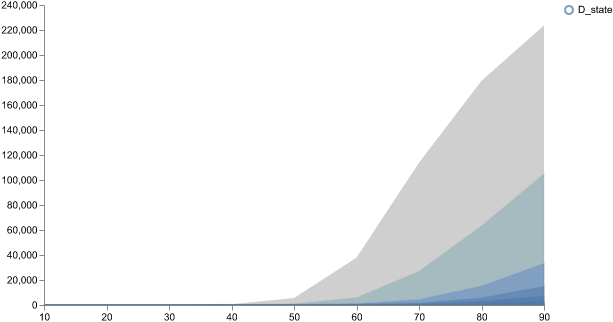

In [6]:
values = [e/100 for e in range(0,50, 5)]
qlow: float = [0+v for v in values]
qhigh: float = [1-v for v in values]

schema = plots.trajectories(result1["data"], keep="D_state", qlow=qlow, qhigh=qhigh)
schema = plots.resize(schema, w=500)
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, format="png")